# Airbnb Price Prediction for Cape Town

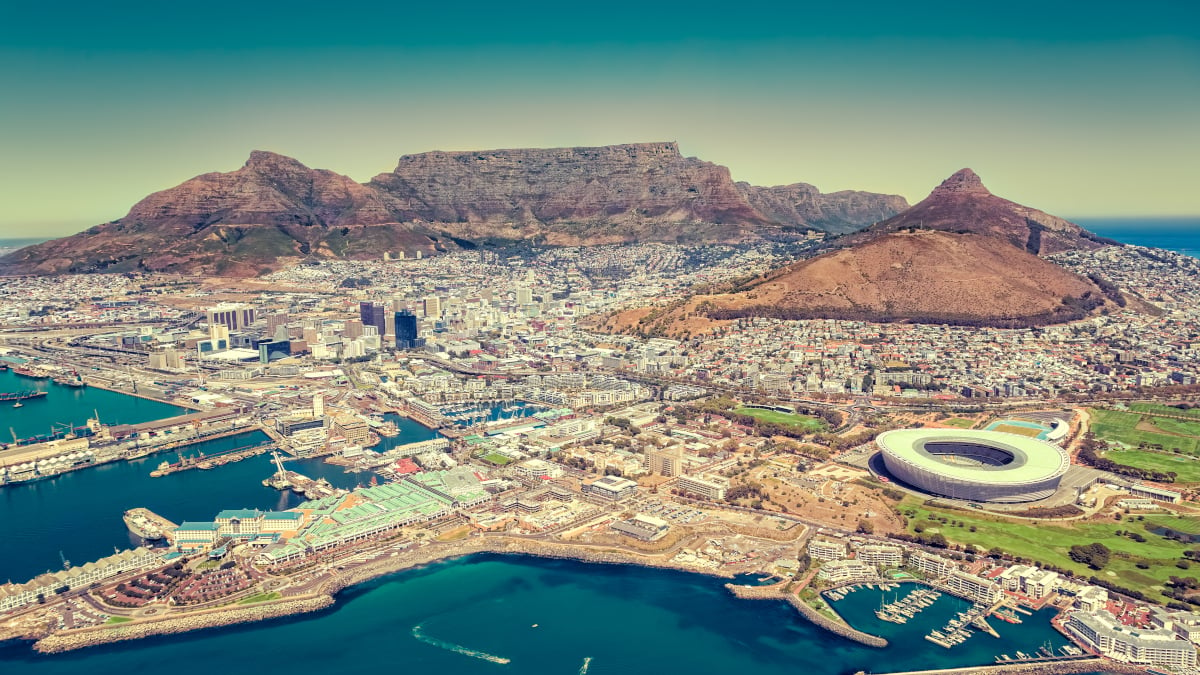

In [1]:
from IPython.display import Image, display

# Provide the path to your local image
image_path = r"C:\Users\masin\OneDrive\Documents\Deloitte\Cape-Town.jpg"
display(Image(filename=image_path))


## Table of Contents

* [1. Case Study Overview](#chapter1)
  * [1.1 Introduction](#section_1_1)
      * [1.1.1 Problem Statement](#sub_section_1_1_1)
      * [1.1.2 Objectives](#sub_section_1_1_2)
* [2. Importing Packages](#chapter2)
* [3. Loading Data](#chapter3)
* [4. Data Cleaning](#chapter4)
* [5. Exploratory Data Analysis (EDA)](#chapter5)
* [6. Data Pre-Processing](#chapter6)
* [7. Model Evaluation and Training](#Chapter7)
* [8. Recommendations](#Chapter8)
* [9. Conclusion](#Chapter9)

# <font color=red>1.Case Study Overview</font>

## 1.1 Introduction
Cape Town’s short-term rental market, primarily driven by Airbnb, plays a pivotal role in its vibrant tourism economy. The pricing of Airbnb listings is influenced by a complex interplay of factors, including property features (e.g., room type, minimum nights), location (e.g., proximity to the city center), seasonality, and host characteristics (e.g., number of listings, reviews). The `listings.csv` dataset, sourced from Inside Airbnb for Cape Town (March 2025), provides comprehensive data on listings, including price, room type, location coordinates, availability, and review metrics, enabling a data-driven exploration of pricing dynamics.
This project aims to develop a machine learning model to predict Airbnb listing prices in Cape Town while uncovering actionable insights to guide hosts and travelers. By leveraging the `listings.csv` dataset, we will analyze key trends, engineer relevant features, and build a robust predictive model. The findings will empower hosts to optimize pricing strategies and assist travelers in making informed booking decisions, enhancing decision-making in Cape Town’s competitive rental market.

### 1.1.1 Problem Statement
Predicting optimal Airbnb listing prices in Cape Town is challenging due to the multifaceted nature of influencing factors, such as location, property type, guest demand, and host activity. Traditionally, hosts rely on intuition or market comparisons, which often fail to capture the full complexity of pricing dynamics. A data-driven approach, utilizing the `listings.csv` dataset, can provide deeper insights into the determinants of pricing, enabling more accurate predictions and strategic decision-making.
This project addresses this challenge by analyzing Cape Town’s Airbnb listing data from March 2025. We will investigate factors such as distance from the city center, room type, minimum stay requirements, availability, and review frequency to understand their impact on listing prices. The goal is to develop a predictive model that accurately forecasts prices and delivers actionable insights for hosts to optimize revenue and for travelers to identify cost-effective accommodations.

### 1.1.2 Aim
The aim of this project is to build a machine learning model to predict Airbnb listing prices in Cape Town (March 2025) using the `listings.csv` dataset, while identifying key factors that drive pricing. Through exploratory data analysis, feature engineering, and robust modeling, we seek to uncover patterns and trends that influence prices, providing valuable intelligence for hosts to enhance pricing strategies and for travelers to make informed booking choices in Cape Town’s short-term rental market.

### 1.1.3 Objectives
Data Acquisition and Analysis: To acquire and analyze the `listings.csv` dataset from Inside Airbnb, identifying key trends, pricing factors, and patterns in Cape Town’s short-term rental market through structured exploratory data analysis.

Feature Exploration and Engineering: To investigate the impact of variables such as distance from the city center, room type, minimum nights, availability, and review metrics on listing prices, and to create derived features to enhance model performance.

Model Development and Evaluation: To develop and evaluate a machine learning model for predicting listing prices, using appropriate algorithms, training/testing splits, and performance metrics, while justifying modeling choices and addressing limitations.

Actionable Recommendations: To provide clear, data-driven recommendations for Airbnb hosts to optimize pricing strategies and for travelers to select cost-effective listings, supported by insights into the most significant predictors of pricing in Cape Town’s Airbnb market.


# <font color=red>2. Importing Packages</font>

In [28]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
from datetime import datetime
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder # Added LabelEncoder here
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    r2_score, mean_absolute_error, mean_squared_error, 
    mean_absolute_percentage_error, explained_variance_score
) 
from xgboost import XGBRegressor
import xgboost as xgb
from scipy import stats
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# Setting plot style for better visualization (for matplotlib plots)
plt.style.use('ggplot')

# Jupyter specific magic command for inline plotting
# If you are not in a Jupyter environment, you can remove this line.
%matplotlib inline

# <font color=red>3. Data Loading </font>

<div class="alert alert-block alert-info">
<b>Data Loading </b>  refers to the process of importing data into a workspace to make it ready for analysis. It involves reading data from various sources, such as files, databases, or APIs, and converting it into a format suitable for processing and analysis.
</div>

In [3]:
# Load the csv file
airbnb_df = pd.read_csv("listings.csv")

# Display the first few rows of the DataFrame to verify
print(airbnb_df.head())

      id                                               name  host_id  \
0   3191                            Malleson Garden Cottage     3754   
1  15068                                         Grande Bay    59318   
2  15199                            Self catering apartment    59694   
3  15354  Aurora Self Catering Units, Durbanville, Cape ...    60196   
4  16259  Glorious private Cottage, char weekdays included.    63255   

  host_name  neighbourhood_group neighbourhood  latitude  longitude  \
0  Brigitte                  NaN       Ward 57 -33.94762   18.47599   
1     Linda                  NaN       Ward 23 -33.78826   18.45940   
2     Alexa                  NaN      Ward 115 -33.91115   18.41235   
3       Ian                  NaN      Ward 112 -33.83074   18.63142   
4    Cheryl                  NaN       Ward 59 -33.99612   18.46563   

         room_type   price  minimum_nights  number_of_reviews last_review  \
0  Entire home/apt   674.0               3                 84  

# <font color=red>4. Data Cleaning </font>

<div class="alert alert-block alert-info">
<b>Data cleaning</b>  refers to the process of identifying and correcting errors, inconsistencies, and inaccuracies in a dataset to improve its quality and reliability for analysis. It involves several steps, including handling missing or incomplete data, correcting data format issues, removing duplicate records, and dealing with outliers or anomalies.
</div>

In [4]:
# display a concise summary of the DataFrame
airbnb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25882 entries, 0 to 25881
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25882 non-null  int64  
 1   name                            25881 non-null  object 
 2   host_id                         25882 non-null  int64  
 3   host_name                       25880 non-null  object 
 4   neighbourhood_group             0 non-null      float64
 5   neighbourhood                   25882 non-null  object 
 6   latitude                        25882 non-null  float64
 7   longitude                       25882 non-null  float64
 8   room_type                       25882 non-null  object 
 9   price                           21016 non-null  float64
 10  minimum_nights                  25882 non-null  int64  
 11  number_of_reviews               25882 non-null  int64  
 12  last_review                     

In [5]:
# Check for missing values in each column
missing_values = airbnb_df.isnull().sum()

# Display the missing values count for each column
print("Missing values in each column:")
print(missing_values)

Missing values in each column:
id                                    0
name                                  1
host_id                               0
host_name                             2
neighbourhood_group               25882
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                              4866
minimum_nights                        0
number_of_reviews                     0
last_review                        5219
reviews_per_month                  5219
calculated_host_listings_count        0
availability_365                      0
number_of_reviews_ltm                 0
license                           25794
dtype: int64


In [6]:
# Drop the 'neighbourhood_group' and 'license' columns
airbnb_df = airbnb_df.drop(columns=['neighbourhood_group', 'license'])

# Fill missing values in 'reviews_per_month' with 0
airbnb_df['reviews_per_month'] = airbnb_df['reviews_per_month'].fillna(0)

# Fill missing values in 'price' with the mean
airbnb_df['price'] = airbnb_df['price'].fillna(airbnb_df['price'].mean())

# Convert 'last_review' to datetime objects and fill missing values with the mode
airbnb_df['last_review'] = pd.to_datetime(airbnb_df['last_review'], errors='coerce')
airbnb_df['last_review'] = airbnb_df['last_review'].fillna(airbnb_df['last_review'].mode()[0])

# Fill missing values in 'name' with its mode
airbnb_df['name'] = airbnb_df['name'].fillna(airbnb_df['name'].mode()[0])

# Fill missing values in 'host_name' with its mode
airbnb_df['host_name'] = airbnb_df['host_name'].fillna(airbnb_df['host_name'].mode()[0])

# Display missing values count for each column to confirm all are handled
print("Missing values after final cleaning steps:")
print(airbnb_df.isnull().sum())

# Display information about the DataFrame to confirm data types and non-null counts
print(airbnb_df.info())

Missing values after final cleaning steps:
id                                0
name                              0
host_id                           0
host_name                         0
neighbourhood                     0
latitude                          0
longitude                         0
room_type                         0
price                             0
minimum_nights                    0
number_of_reviews                 0
last_review                       0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
number_of_reviews_ltm             0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25882 entries, 0 to 25881
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   id                              25882 non-null  int64         
 1   name                            25882 non-null  ob

In [7]:
# Check for duplicate rows in the dataframe
duplicate_values = airbnb_df.duplicated().sum()

# Display the number of duplicate rows
print(f"\nNumber of duplicate rows: {duplicate_values}")


Number of duplicate rows: 0


In [8]:
# Save the cleaned DataFrame to a CSV file
airbnb_df.to_csv('airbnb.csv', index=False)

# <font color=red>5. EXPLORATORY DATA ANALYSIS (EDA)</font>

<div class="alert alert-block alert-info">
<b>Exploratory Data Analysis</b>  Exploratory Data Analysis (EDA) involves examining and visualizing data to uncover patterns, trends, and relationships. It helps in understanding the dataset's structure, detecting anomalies, and generating insights that guide further analysis.
</div>

## 5.1 The distribution of the different types of rooms

The following bar graph shows the count of each room type in the dataset.

In [9]:
# Bar Graph: Distribution of Room Types
room_type_counts = airbnb_df['room_type'].value_counts().reset_index()
room_type_counts.columns = ['Room Type', 'Count']
fig1 = px.bar(room_type_counts, x='Room Type', y='Count',
              title='Distribution of Room Types',
              labels={'Room Type': 'Type of Room', 'Count': 'Number of Listings'},
              color='Room Type',
              template='plotly_white')
fig1.update_layout(xaxis_title_font_size=14, yaxis_title_font_size=14, title_font_size=18)
fig1.show()

### Observations:

- **Dominance of "Entire home/apt":** This category is overwhelmingly the most common, with over 20,000 listings. It significantly outnumbers all other room types combined.

- **Second Most Common: "Private room":** "Private room" is the second most frequent, but its count is substantially lower than "Entire home/apt," appearing to be around 4,000 to 5,000 listings.

- **Minimal "Hotel room" and "Shared room" listings:** Both "Hotel room" and "Shared room" categories have very few listings, barely registering on the graph, suggesting their presence in the dataset is negligible.

### Key Takeaways:

- **Market Focus:** The Airbnb market represented by this dataset is heavily concentrated on full home/apartment rentals. This indicates a primary catering to travelers or groups seeking entire accommodations.

- **Limited Diversity:** There's a clear lack of variety in room types. "Entire home/apt" is the dominant offering, which could reflect specific market demand, regulatory environments, or host preferences.

- **Potential Niche Markets:** The very low number of "Hotel room" and "Shared room" listings might point to untapped niche markets if there's an unmet demand for these types of accommodations.

- **User Choice Impact:** Users searching for "Private room," "Hotel room," or "Shared room" will find significantly fewer options compared to those looking for "Entire home/apt."

## 5.2 The proportion of each room type.

The following pie chart visualizes the percentage distribution of different room types.

In [10]:
# Pie Chart: Proportion of each Room Type

fig2 = px.pie(airbnb_df, names='room_type', title='Proportion of Room Types',
              color_discrete_sequence=px.colors.qualitative.Pastel)
fig2.update_traces(textposition='inside', textinfo='percent+label')
fig2.update_layout(title_font_size=18)
fig2.show()

### Observations:

- **Overwhelming Majority: "Entire home/apt":** This category constitutes the vast majority of listings, accounting for **82.3%** of the total.

- **Significant Minority: "Private room":** "Private room" is the second largest category, making up **17.1%** of the listings.

- **Negligible Other Categories:** "Hotel room" and "Shared room" are almost non-existent, each representing a very tiny fraction (likely less than 1%) of the total, making them barely visible.

### Key Takeaways:

- **Strong Preference for Full Accommodations:** The data clearly indicates that the platform or region's listings are predominantly focused on offering entire homes or apartments, rather than shared spaces or individual rooms within a property.

- **Limited Options for Certain Travelers:** For budget-conscious travelers or those seeking a single room, the available options are significantly fewer, with "Private room" being the only other notable category.

- **Market Saturation vs. Niche Opportunity:** The "Entire home/apt" market appears to be highly saturated. Conversely, if there's demand for hotel rooms or shared accommodations, there might be an unmet need and a potential niche for new listings in those categories, despite the current extremely low supply.

- **Consistency with Bar Graph:** These observations are consistent with the bar graph previously analyzed, reinforcing the conclusion about the dominance of "Entire home/apt" and the scarcity of other room types.

## 5.3 Correlation Map

The following heatmap shows the correlation coefficients between numerical features.

In [11]:
# A value close to 1 indicates a strong positive correlation, -1 a strong negative, and 0 no correlation.
numerical_cols = airbnb_df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = airbnb_df[numerical_cols].corr()

fig3 = go.Figure(data=go.Heatmap(
        z=correlation_matrix.values,
        x=correlation_matrix.columns,
        y=correlation_matrix.index,
        colorscale='Viridis',
        colorbar=dict(title='Correlation Coefficient')
    ))
fig3.update_layout(
    title='Correlation Matrix of Numerical Features',
    xaxis_title='Features',
    yaxis_title='Features',
    xaxis_nticks=len(numerical_cols),
    yaxis_nticks=len(numerical_cols),
    title_font_size=18
)
fig3.show()


### Observations:

**1. Strong Positive Correlations (Yellow/Light Green):**

- `number_of_reviews`, `reviews_per_month`, and `number_of_reviews_ltm` (reviews in the last twelve months) are all highly positively correlated with each other. This is expected, as these metrics are inherently linked to review activity.

- `calculated_host_listings_count` and `availability_365` show a moderate positive correlation, suggesting that hosts with more listings tend to have higher overall availability.

**2.Weak Correlations (Darker Blue/Purple):**

- `price` exhibits very weak correlations with most other numerical features. The row and column corresponding to `price` are predominantly dark blue/purple, indicating little to no linear relationship with variables like review counts, minimum nights, or availability.

- `minimum_nights` also shows generally weak correlations with other features.

- `latitude` and `longitude` have some weak correlations but no strong, clear patterns with other variables.

**3. Perfect Self-Correlation (Diagonal - Bright Yellow):**

- As expected, each feature is perfectly correlated with itself (a correlation coefficient of 1), forming the bright yellow diagonal line.

**4. Absence of Strong Negative Correlations:** There are no prominent dark purple or black areas indicating strong negative correlations (close to -1), meaning no two numerical features move in strongly opposite directions.

### Key Takeaways:

- **Interrelated Review Metrics:** The various review-related features are highly interconnected. This implies that if a listing is performing well in terms of total reviews, it's likely also performing well in recent review activity and monthly review rates. For predictive modeling, this might suggest redundancy, and one or two of these features could potentially represent the overall review activity.

- **Price Independence (Linear):** The price of a listing does not appear to have a strong linear relationship with other numerical factors like review counts, minimum stay requirements, or host activity. This suggests that other, possibly non-numerical or external, factors (e.g., specific location within a neighborhood, unique amenities, property size, seasonality, or qualitative aspects of the listing) are more significant drivers of price.

- **Host Portfolio and Availability:** Hosts managing more listings tend to have higher overall availability, which could indicate professional management or a larger scale of operation.

- **Need for Further Exploration:** For features with weak linear correlations, especially `price`, it's crucial to explore non-linear relationships or consider additional data sources and feature engineering to build more accurate predictive models.

## 5.4 Distribution of Price

The following histogram shows the frequency distribution of listing prices.

In [12]:
# The histogram helps to identify the typical price range and any outliers.
fig4 = px.histogram(airbnb_df, x='price', nbins=50,
                    title='Distribution of Listing Prices',
                    labels={'price': 'Price (ZAR)', 'count': 'Number of Listings'},
                    color_discrete_sequence=['#636EFA'],
                    template='plotly_white')
fig4.update_layout(xaxis_title_font_size=14, yaxis_title_font_size=14, title_font_size=18)
fig4.show()

### Observations:

**1. Highly Skewed Distribution:** The most striking characteristic is the extreme right-skewness of the data. The vast majority of listings are concentrated at the lower end of the price spectrum, predominantly below 25,000 ZAR.

**2. Peak at Low Prices:** The tallest bar is located very close to the 0 ZAR mark, indicating that a very high number of listings fall within the lowest price ranges (likely a few thousand ZAR).

**3. Rapid Decline in Frequency:** As the price increases, the count of listings drops off very sharply. There are significantly fewer listings in the 25,000-50,000 ZAR range, and the frequency becomes extremely low for prices beyond that.

**4. Presence of Outliers/High-Priced Listings:** Despite the rapid decline, there are a few very low-frequency bars extending far to the right of the graph (e.g., around 125k, 150k, 175k, and even above 200k ZAR). These represent a small number of listings with exceptionally high prices, acting as outliers.

### Key Takeaways:

- **Affordable Market Dominance:** The Airbnb market in this dataset is primarily composed of affordable or moderately priced listings. This suggests it caters broadly to budget-conscious travelers.

- **Luxury/High-End Niche:** While the market is dominated by lower-priced options, a small, distinct segment of very high-priced luxury or unique accommodations exists, though they are rare.

- **Implications for Central Tendency:** Due to the extreme skewness and the presence of high-value outliers, **the mean (average) price will likely be significantly higher than the median price**. The median would be a more representative measure of a typical listing's price.

- **Data Transformation for Modeling:** For machine learning models like Linear Regression, this highly skewed distribution often necessitates a **logarithmic transformation** of the `price` variable to make it more symmetrical and improve model performance.

**Potential for Price Segmentation:** The distribution naturally suggests a segmentation of the market into different price tiers (e.g., budget, mid-range, luxury).

## 5.5 Scatter Plot of Price vs Number of Reviews

The following scatter plot explores the relationship between the price of a listing and the number of reviews it has received.

In [13]:
# It can help identify if more popular listings (higher reviews) tend to have higher or lower prices.
fig5 = px.scatter(airbnb_df, x='number_of_reviews', y='price',
                  title='Price vs. Number of Reviews',
                  labels={'number_of_reviews': 'Number of Reviews', 'price': 'Price (ZAR)'},
                  hover_data=['name', 'room_type'],
                  color='room_type', # Color points by room type for more insight
                  template='plotly_white')
fig5.update_layout(xaxis_title_font_size=14, yaxis_title_font_size=14, title_font_size=18)
fig5.show()

### Observations:

**1. Inverse Relationship for Most Listings:** There's a clear general trend where listings with a very high number of reviews tend to have lower prices. The densest concentration of data points is in the bottom-left corner, indicating a large number of listings with low prices and relatively few reviews. As the number of reviews increases, the prices generally remain low.

**2. High-Priced Listings Have Few Reviews:** Conversely, listings with very high prices (e.g., above 50,000 ZAR, extending up to and beyond 200,000 ZAR) almost exclusively have a very low number of reviews (typically less than 50, often less than 10). This creates a distinct vertical "tail" of points along the y-axis (price) at very low review counts.

**3. "Entire home/apt" Dominance:** The vast majority of the data points are blue, representing "Entire home/apt" listings. This visually reinforces their overwhelming dominance in the dataset, as seen in previous charts.

**4. "Private room" Distribution:** "Private room" listings (red points) are also concentrated at lower prices and generally have fewer reviews, mirroring the main cluster of "Entire home/apt" but with fewer instances of extremely high review counts.

**5. Scarcity of "Hotel room" and "Shared room":** "Hotel room" (green) and "Shared room" (purple) data points are extremely sparse across the entire plot, reflecting their very low counts in the dataset. They are primarily found at lower prices and very low review counts.

**6. Outliers in Reviews:** While most listings have fewer than 200 reviews, there are a few outlier listings with exceptionally high review counts (e.g., 500, 600, 700, and even over 800 reviews). These high-review outliers appear to be predominantly "Entire home/apt" and are consistently priced at the lower end of the spectrum.

### Key Takeaways:

- **Price-Popularity Trade-off (Implied):** The plot suggests a trade-off or a specific market dynamic: either lower-priced listings attract more bookings and thus more reviews (due to affordability and higher turnover), or listings that accumulate a large number of reviews tend to be priced more competitively. High-priced listings, perhaps due to their niche appeal, longer stay durations, or less frequent bookings, do not generate a high volume of reviews.

- **High-End Market Behavior:** The high-priced properties likely cater to a different segment of the market, possibly guests seeking exclusivity, longer stays, or specific amenities, which doesn't necessarily translate into high review volumes.

- **Review Count as an Indicator:** A high number of reviews could serve as a proxy for a listing's popularity, value for money, or high booking frequency.

- **"Entire home/apt" Drives Market Activity:** Given their sheer volume, "Entire home/apt" listings are the primary drivers of review activity and define the general price-review relationship observed in the dataset.

- **Limited Insights for Minor Room Types:** The scarcity of data for "Hotel room" and "Shared room" makes it challenging to draw robust conclusions about their specific price-review dynamics.

# <font color=red>6.Data  Pre-Processing</font>

<div class="alert alert-block alert-info">
<b>Preprocessing</b>  Preprocessing involves transforming raw data into a clean and usable format for analysis. This step includes handling missing values, encoding categorical variables, normalizing numerical features, and other techniques to improve the quality of the data and ensure it is suitable for modeling.
</div>

### 6.1 Address the Inverse Price-Review Relationship:

In [15]:
df = pd.read_csv('airbnb.csv')

# Essential cleaning for columns used in feature creation
# Fill 'price' NaNs with its mean, as it's used in calculations and quantiles
df['price'] = df['price'].fillna(df['price'].mean())
# Fill 'number_of_reviews' NaNs with 0, as it's used in calculations and quantiles
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)

print("DataFrame loaded and essential columns cleaned.")
print(f"Initial df shape: {df.shape}")

# --- Create features that capture this relationship ---
def create_price_review_features(df):
    """
    Creates new features to capture the relationship between price and reviews.
    Includes price_per_review, review_density, and binary flags for specific
    market segments based on price and review quantiles.
    """
    df_copy = df.copy() # Work on a copy to avoid modifying the original DataFrame directly

    # Price-review interaction features
    # +1 to number_of_reviews to avoid division by zero
    df_copy['price_per_review'] = df_copy['price'] / (df_copy['number_of_reviews'] + 1)
    # reviews per 1000 ZAR; add 1 to denominator to avoid division by zero if price is 0
    df_copy['review_density'] = df_copy['number_of_reviews'] / (df_copy['price'] / 1000 + 1)

    # Market positioning features (binary flags)
    # Ensure quantiles are calculated only if there's enough non-null data
    price_80th_quantile = df_copy['price'].quantile(0.8) if df_copy['price'].notna().any() else 0
    price_20th_quantile = df_copy['price'].quantile(0.2) if df_copy['price'].notna().any() else 0
    reviews_80th_quantile = df_copy['number_of_reviews'].quantile(0.8) if df_copy['number_of_reviews'].notna().any() else 0
    reviews_20th_quantile = df_copy['number_of_reviews'].quantile(0.2) if df_copy['number_of_reviews'].notna().any() else 0

    df_copy['high_price_low_reviews'] = (
        (df_copy['price'] > price_80th_quantile) &
        (df_copy['number_of_reviews'] < reviews_20th_quantile)
    ).astype(int)

    df_copy['high_reviews_low_price'] = (
        (df_copy['number_of_reviews'] > reviews_80th_quantile) &
        (df_copy['price'] < price_20th_quantile)
    ).astype(int)

    return df_copy

# Apply the feature creation function
df_enhanced = create_price_review_features(df)

# Verify the patterns
print("\nVerification of new features:")
print(f"High-price, low-review listings: {df_enhanced['high_price_low_reviews'].sum()} samples")
print(f"High-review, low-price listings: {df_enhanced['high_reviews_low_price'].sum()} samples")

print("\nFirst 5 rows of DataFrame with new features:")
print(df_enhanced[['price', 'number_of_reviews', 'price_per_review',
                   'review_density', 'high_price_low_reviews',
                   'high_reviews_low_price']].head())


DataFrame loaded and essential columns cleaned.
Initial df shape: (25882, 16)

Verification of new features:
High-price, low-review listings: 0 samples
High-review, low-price listings: 1436 samples

First 5 rows of DataFrame with new features:
         price  number_of_reviews  price_per_review  review_density  \
0   674.000000                 84          7.929412       50.179211   
1  3000.000000                  0       3000.000000        0.000000   
2  2250.000000                  2        750.000000        0.615385   
3  3267.091454                  0       3267.091454        0.000000   
4  1563.000000                 17         86.833333        6.632852   

   high_price_low_reviews  high_reviews_low_price  
0                       0                       1  
1                       0                       0  
2                       0                       0  
3                       0                       0  
4                       0                       0  


### Date Feature Engineering

In [16]:
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
current_date = datetime.now() # Or pd.to_datetime('2025-07-16') if you want a fixed date
df['days_since_last_review'] = (current_date - df['last_review']).dt.days
df['month_of_last_review'] = df['last_review'].dt.month
df['year_of_last_review'] = df['last_review'].dt.year

# Drop the original 'last_review' column as its information has been extracted
df = df.drop(columns=['last_review'])

# --- Display the updated DataFrame information ---
print("\nDataFrame after date feature engineering:")
print(df.info())
print("\nFirst 5 rows of the DataFrame with new date features:")
print(df[['days_since_last_review', 'month_of_last_review', 'year_of_last_review']].head())



DataFrame after date feature engineering:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25882 entries, 0 to 25881
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              25882 non-null  int64  
 1   name                            25882 non-null  object 
 2   host_id                         25882 non-null  int64  
 3   host_name                       25882 non-null  object 
 4   neighbourhood                   25882 non-null  object 
 5   latitude                        25882 non-null  float64
 6   longitude                       25882 non-null  float64
 7   room_type                       25882 non-null  object 
 8   price                           25882 non-null  float64
 9   minimum_nights                  25882 non-null  int64  
 10  number_of_reviews               25882 non-null  int64  
 11  reviews_per_month               25882 non-null  fl

### 6.2 Segment-Based Feature Analysis:

In [17]:
# Analyze different market segments based on your observations
def analyze_market_segments(df):
    # Define segments based on price-review patterns
    conditions = [
        (df['price'] <= 25000) & (df['number_of_reviews'] >= 50),  # High-activity budget
        (df['price'] <= 25000) & (df['number_of_reviews'] < 50),   # Low-activity budget
        (df['price'] > 50000) & (df['number_of_reviews'] < 20),    # Luxury/premium
        (df['price'].between(25000, 50000))                        # Mid-range
    ]
    
    labels = ['Budget_Popular', 'Budget_Quiet', 'Luxury', 'Mid_Range']
    df['market_segment'] = np.select(conditions, labels, default='Other')
    
    return df

df_segmented = analyze_market_segments(df_enhanced)
print(df_segmented['market_segment'].value_counts())

market_segment
Budget_Quiet      21902
Budget_Popular     3727
Mid_Range           185
Luxury               68
Name: count, dtype: int64


### 6.3 Room-Type Specific Feature Importance:

In [18]:
df_raw = pd.read_csv('airbnb.csv')

# Perform minimal cleaning necessary for this analysis
# Fill missing 'price' and 'reviews_per_month' as they are used in correlations
df_raw['price'] = df_raw['price'].fillna(df_raw['price'].mean())
df_raw['number_of_reviews'] = df_raw['number_of_reviews'].fillna(0) # Ensure no NaN in reviews for correlation

# Drop columns that are definitely not needed and might have caused issues or are irrelevant for this specific analysis
# 'neighbourhood_group' and 'license' were identified as mostly null or irrelevant earlier
# 'host_name' and 'name' are text and not used in this numeric correlation analysis
# 'id' is an identifier
df_segmented = df_raw.drop(columns=['neighbourhood_group', 'license', 'host_name', 'name', 'id'], errors='ignore')

print("DataFrame prepared for room type specific analysis.")
print(f"Columns in df_segmented: {df_segmented.columns.tolist()}")

# --- Original Analysis Code (now working with df_segmented that has 'room_type') ---

# Since "Entire home/apt" dominates, analyze it separately
entire_homes = df_segmented[df_segmented['room_type'] == 'Entire home/apt'].copy()
private_rooms = df_segmented[df_segmented['room_type'] == 'Private room'].copy()

def room_type_feature_analysis(data, room_type_name):
    print(f"\n=== {room_type_name} Feature Analysis ===")

    # Ensure 'price' and 'number_of_reviews' are numeric and not all NaN for correlation
    if 'price' not in data.columns or data['price'].isnull().all():
        print(f"Warning: 'price' column not found or all NaN in {room_type_name} data. Cannot compute correlations.")
        return None
    if 'number_of_reviews' not in data.columns or data['number_of_reviews'].isnull().all():
        print(f"Warning: 'number_of_reviews' column not found or all NaN in {room_type_name} data. Cannot compute correlations.")
        return None

    # Key correlations for this room type
    # Select only numerical columns for correlation calculation
    numeric_cols = data.select_dtypes(include=[np.number]).columns.tolist()
    # Ensure 'price' is in numeric_cols before trying to correlate with it
    if 'price' in numeric_cols:
        # Remove 'price' from the features to correlate with itself, unless explicitly desired
        numeric_features_for_corr = [col for col in numeric_cols if col != 'price']
        if not numeric_features_for_corr:
            print(f"Not enough numerical features in {room_type_name} to compute correlations other than price itself.")
            return None
        price_correlations = data[numeric_features_for_corr].corrwith(data['price']).abs().sort_values(ascending=False)

        print("Top price correlations:")
        print(price_correlations.head(10))

        # Price-Review relationship strength
        price_review_corr = data['price'].corr(data['number_of_reviews'])
        print(f"Price-Review correlation: {price_review_corr:.3f}")

        return price_correlations
    else:
        print(f"Price column not found in numeric columns for {room_type_name} data. Cannot compute correlations.")
        return None


entire_home_corr = room_type_feature_analysis(entire_homes, "Entire Home/Apt")
private_room_corr = room_type_feature_analysis(private_rooms, "Private Room")

print("\nAnalysis complete for selected room types.")


DataFrame prepared for room type specific analysis.
Columns in df_segmented: ['host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm']

=== Entire Home/Apt Feature Analysis ===
Top price correlations:
reviews_per_month                 0.135374
longitude                         0.113176
number_of_reviews_ltm             0.112500
number_of_reviews                 0.088981
host_id                           0.057310
calculated_host_listings_count    0.040220
latitude                          0.028177
availability_365                  0.026179
minimum_nights                    0.016660
dtype: float64
Price-Review correlation: -0.089

=== Private Room Feature Analysis ===
Top price correlations:
reviews_per_month                 0.185979
number_of_reviews_ltm             0.161560
availability_365                  0.153581


### 6.4 Review-Based Feature Engineering:

In [19]:
# Create features that capture the insights from your scatter plot
def engineer_review_features(df):
    # Popularity indicators
    df['is_popular_listing'] = (df['number_of_reviews'] > df['number_of_reviews'].quantile(0.8)).astype(int)
    df['is_premium_listing'] = (df['price'] > df['price'].quantile(0.9)).astype(int)
    
    # Market behavior features
    df['reviews_per_availability'] = df['number_of_reviews'] / (df['availability_365'] + 1)
    df['turnover_indicator'] = df['number_of_reviews'] / (df['minimum_nights'] + 1)
    
    # Room type market position
    df['room_type_price_rank'] = df.groupby('room_type')['price'].rank(pct=True)
    df['room_type_review_rank'] = df.groupby('room_type')['reviews_per_month'].rank(pct=True)
    
    return df

df_final = engineer_review_features(df_segmented)

### 6.5 Updated Feature Selection Based on Insights:

In [20]:
# Prioritize features based on price-review relationship insights
high_priority_features = [
    # Core location (always critical for price)
    'latitude', 'longitude', 'neighbourhood',
    
    # Room type (dominant market driver)
    'room_type',
    
    # Review activity features (capturing the inverse relationship)
    'number_of_reviews',
    'price_per_review',          # New engineered feature
    'review_density',            # New engineered feature
    
    # Market positioning
    'is_popular_listing',        # High review indicator
    'is_premium_listing',        # High price indicator
    'market_segment',            # Price-review behavior segment
    
    # Host and availability
    'calculated_host_listings_count',
    'availability_365',
    'minimum_nights'
]

# Features to likely drop based on the analysis
low_priority_features = [
    'reviews_per_month',         # Redundant with number_of_reviews
    'number_of_reviews_ltm',     # Redundant with number_of_reviews
    'last_review',               # Date less predictive than counts
    'name',                      # High cardinality, noisy
    'host_name'                  # Similar issue
]

print("Recommended feature set based on price-review insights:")
for feature in high_priority_features:
    if feature in df_final.columns:
        print(f"✓ {feature}")
    else:
        print(f"! {feature} (needs engineering)")

Recommended feature set based on price-review insights:
✓ latitude
✓ longitude
✓ neighbourhood
✓ room_type
✓ number_of_reviews
! price_per_review (needs engineering)
! review_density (needs engineering)
✓ is_popular_listing
✓ is_premium_listing
! market_segment (needs engineering)
✓ calculated_host_listings_count
✓ availability_365
✓ minimum_nights


### 6.6 Validate Feature Selection with Market Segments:

In [21]:
df_raw = pd.read_csv('airbnb.csv')

print("DataFrame loaded for feature validation by segment.")

# Perform initial cleaning and feature engineering to create df_final
df_final = df_raw.copy()

# Fill missing values for columns used in feature engineering and correlations
df_final['price'] = df_final['price'].fillna(df_final['price'].mean())
df_final['number_of_reviews'] = df_final['number_of_reviews'].fillna(0)
df_final['reviews_per_month'] = df_final['reviews_per_month'].fillna(0) # Ensure this is filled for review_density

# Drop irrelevant/high cardinality columns as per previous steps
df_final = df_final.drop(columns=['neighbourhood_group', 'license', 'host_name', 'name', 'id'], errors='ignore')

# --- Date Feature Engineering (as done in previous models) ---
if 'last_review' in df_final.columns:
    df_final['last_review'] = pd.to_datetime(df_final['last_review'], errors='coerce')
    current_date = datetime.now()
    df_final['days_since_last_review'] = (current_date - df_final['last_review']).dt.days
    df_final['month_of_last_review'] = df_final['last_review'].dt.month
    df_final['year_of_last_review'] = df_final['last_review'].dt.year
    df_final = df_final.drop(columns=['last_review'])
else:
    # If 'last_review' is not present, add placeholder columns to avoid errors later
    df_final['days_since_last_review'] = 0
    df_final['month_of_last_review'] = 0
    df_final['year_of_last_review'] = 0

# --- Feature Engineering for market_segment and other derived features ---
# These are similar to what was in AirbnbXGBoostPredictor.prepare_features
df_final['price_per_review'] = df_final['price'] / (df_final['number_of_reviews'] + 1)
df_final['review_density'] = df_final['number_of_reviews'] / (df_final['price'] / 1000 + 1) # Add 1 to denominator
df_final['availability_ratio'] = df_final['availability_365'] / 365
df_final['is_professional_host'] = (df_final['calculated_host_listings_count'] > 5).astype(int)
df_final['lat_long_interaction'] = df_final['latitude'] * df_final['longitude']

# Create high_price_listing and popular_listing
if 'price' in df_final.columns and not df_final['price'].isnull().all():
    df_final['high_price_listing'] = (df_final['price'] > df_final['price'].quantile(0.8)).astype(int)
else:
    df_final['high_price_listing'] = 0

if 'number_of_reviews' in df_final.columns and not df_final['number_of_reviews'].isnull().all():
    df_final['popular_listing'] = (df_final['number_of_reviews'] > df_final['number_of_reviews'].quantile(0.8)).astype(int)
else:
    df_final['popular_listing'] = 0

# --- Create 'market_segment' column ---
def create_market_segment(row):
    if row['high_price_listing'] == 1 and row['popular_listing'] == 1:
        return 'Premium Popular'
    elif row['high_price_listing'] == 1 and row['popular_listing'] == 0:
        return 'Premium Niche'
    elif row['high_price_listing'] == 0 and row['popular_listing'] == 1:
        return 'Value Popular'
    else: # high_price_listing == 0 and popular_listing == 0
        return 'Standard'

df_final['market_segment'] = df_final.apply(create_market_segment, axis=1)
print("Market segment feature created.")
print(f"df_final shape after preprocessing: {df_final.shape}")
print(f"df_final columns: {df_final.columns.tolist()}")
print(f"Unique market segments: {df_final['market_segment'].unique()}")


# --- 2. Define the validate_features_by_segment function ---

def validate_features_by_segment(df, feature_list):
    results = {}

    # Ensure 'market_segment' is present before iterating
    if 'market_segment' not in df.columns:
        print("Error: 'market_segment' column not found in DataFrame.")
        return results

    print("\n--- Validating Features by Market Segment ---")
    for segment in df['market_segment'].unique():
        if segment == 'Other': # Skip 'Other' if it's a placeholder for unclassified segments
            continue

        segment_data = df[df['market_segment'] == segment].copy()
        if len(segment_data) < 100:  # Need sufficient data for meaningful cross-validation
            print(f"Skipping segment '{segment}' due to insufficient data (n={len(segment_data)} < 100).")
            continue

        # Encode categorical variables within the segment data
        segment_encoded = segment_data.copy()
        # Only encode columns that are in the feature_list AND are in the segment_encoded DataFrame
        categorical_cols_to_encode = [col for col in ['neighbourhood', 'room_type', 'market_segment'] if col in segment_encoded.columns and col in feature_list]

        for col in categorical_cols_to_encode:
            le = LabelEncoder()
            # Ensure the column is treated as string before encoding
            segment_encoded[col] = le.fit_transform(segment_encoded[col].astype(str))

        # Select available features
        # Ensure 'price' is not in available_features as it's the target
        available_features = [f for f in feature_list if f in segment_encoded.columns and f != 'price']
        
        if not available_features:
            print(f"Warning: No valid features found for segment '{segment}'. Skipping.")
            continue

        X = segment_encoded[available_features]
        # Log transform for skewed prices, ensuring 'price' column exists
        if 'price' in segment_encoded.columns:
            y = np.log1p(segment_encoded['price'])
        else:
            print(f"Error: 'price' column not found in segment '{segment}' data. Skipping.")
            continue

        # Ensure X and y have enough samples for cross-validation (cv=5 requires at least 5 samples)
        if len(X) < 5:
            print(f"Skipping segment '{segment}' due to too few samples for CV (n={len(X)} < 5).")
            continue

        rf = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # Use all cores
        scores = cross_val_score(rf, X, y, cv=5, scoring='r2', n_jobs=-1) # Use all cores

        results[segment] = {
            'r2_mean': scores.mean(),
            'r2_std': scores.std(),
            'sample_size': len(segment_data)
        }

        print(f"{segment}: R² = {scores.mean():.3f} (±{scores.std()*2:.3f}), n={len(segment_data)}")

    return results

# --- 3. Define high_priority_features and Call the function ---

# Define a list of high-priority features that your models use
# This should include all features you intend to use in the validation
high_priority_features = [
    'latitude', 'longitude', 'neighbourhood', 'room_type',
    'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
    'availability_365', 'price_per_review', 'review_density',
    'availability_ratio', 'is_professional_host', 'lat_long_interaction',
    'high_price_listing', 'popular_listing',
    'days_since_last_review', 'month_of_last_review', 'year_of_last_review',
    'market_segment' # Include market_segment if you want to encode it within the function
]

# Validate the feature selection by segment
validation_results = validate_features_by_segment(df_final, high_priority_features)

print("\nValidation results across segments:")
for segment, metrics in validation_results.items():
    print(f"  {segment}: Mean R² = {metrics['r2_mean']:.4f}, Std R² = {metrics['r2_std']:.4f}, Sample Size = {metrics['sample_size']}")



DataFrame loaded for feature validation by segment.
Market segment feature created.
df_final shape after preprocessing: (25882, 23)
df_final columns: ['host_id', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365', 'number_of_reviews_ltm', 'days_since_last_review', 'month_of_last_review', 'year_of_last_review', 'price_per_review', 'review_density', 'availability_ratio', 'is_professional_host', 'lat_long_interaction', 'high_price_listing', 'popular_listing', 'market_segment']
Unique market segments: ['Value Popular' 'Standard' 'Premium Niche' 'Premium Popular']

--- Validating Features by Market Segment ---
Value Popular: R² = 0.993 (±0.006), n=4382
Standard: R² = 0.994 (±0.003), n=16672
Premium Niche: R² = 0.995 (±0.004), n=4073
Premium Popular: R² = 0.957 (±0.060), n=755

Validation results across segments:
  Value Popular: Mean R² = 0.9929, Std R² = 0.0028, Sam

# <font color=red>7. Model Evaluation and Training</font>

<div class="alert alert-block alert-info">
  Model training involves using a dataset to teach a machine learning algorithm how to make predictions or decisions. During this process, the algorithm learns patterns and relationships within the data, which it uses to generalize and predict outcomes on new, unseen data.
</div>

### 7.1 XGBoost (Gradient Boosting) 

In [22]:
class AirbnbXGBoostPredictor:
    """
    A class to train, evaluate, and predict Airbnb listing prices using an XGBoost Regressor.
    It includes comprehensive preprocessing, feature engineering, hyperparameter tuning,
    and detailed evaluation metrics.
    """
    def __init__(self):
        self.model = None
        self.label_encoders = {} # Stores LabelEncoders for categorical features
        self.scaler = None       # Stores StandardScaler for numerical features
        self.feature_importance = None
        self.evaluation_results = {} # Stores all evaluation metrics

    def _engineer_date_features(self, df):
        """Extracts numerical features from 'last_review' column."""
        if 'last_review' in df.columns:
            df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
            current_date = datetime.now()
            df['days_since_last_review'] = (current_date - df['last_review']).dt.days
            df['month_of_last_review'] = df['last_review'].dt.month
            df['year_of_last_review'] = df['last_review'].dt.year
            df = df.drop(columns=['last_review'])
        else:
            # Add placeholder columns if 'last_review' is missing
            df['days_since_last_review'] = 0
            df['month_of_last_review'] = 0
            df['year_of_last_review'] = 0
        return df

    def prepare_features(self, df):
        """
        Prepares and engineers features for Airbnb price prediction.
        Includes handling missing values, creating new features, and date engineering.
        """
        df_prep = df.copy()

        # Simple missing value imputation (can be improved with more sophisticated methods)
        df_prep = df_prep.fillna(0)

        # Feature engineering
        df_prep['price_per_review'] = df_prep['price'] / (df_prep['number_of_reviews'] + 1)
        df_prep['review_density'] = df_prep['number_of_reviews'] / (df_prep['price'] / 1000 + 1)
        df_prep['availability_ratio'] = df_prep['availability_365'] / 365
        df_prep['is_professional_host'] = (df_prep['calculated_host_listings_count'] > 5).astype(int)
        df_prep['lat_long_interaction'] = df_prep['latitude'] * df_prep['longitude']

        # Create binary flags for high-priced and popular listings
        if 'price' in df_prep.columns and df_prep['price'].notna().any():
            df_prep['high_price_listing'] = (df_prep['price'] > df_prep['price'].quantile(0.8)).astype(int)
        else:
            df_prep['high_price_listing'] = 0

        if 'number_of_reviews' in df_prep.columns and df_prep['number_of_reviews'].notna().any():
            df_prep['popular_listing'] = (df_prep['number_of_reviews'] > df_prep['number_of_reviews'].quantile(0.8)).astype(int)
        else:
            df_prep['popular_listing'] = 0

        # Engineer date-related features
        df_prep = self._engineer_date_features(df_prep)

        return df_prep

    def encode_categorical_features(self, df, fit=True):
        """
        Encodes categorical variables ('neighbourhood', 'room_type') using LabelEncoder.
        Handles unseen labels during transformation by assigning -1.
        """
        df_encoded = df.copy()
        categorical_cols = ['neighbourhood', 'room_type']

        for col in categorical_cols:
            if col in df_encoded.columns:
                if fit:
                    self.label_encoders[col] = LabelEncoder()
                    df_encoded[col] = self.label_encoders[col].fit_transform(df_encoded[col].astype(str))
                else:
                    le = self.label_encoders.get(col)
                    if le:
                        # Map known labels, unseen labels get -1
                        df_encoded[col] = df_encoded[col].astype(str).apply(
                            lambda x: le.transform([x])[0] if x in le.classes_ else -1
                        )
                    else:
                        print(f"Warning: No LabelEncoder found for {col} during transform. Skipping.")
                        df_encoded[col] = 0 # Default to 0 or another suitable value

        return df_encoded

    def select_features(self, df):
        """Selects optimal features based on a predefined list and DataFrame availability."""
        feature_cols = [
            'latitude', 'longitude', 'neighbourhood', 'room_type',
            'minimum_nights', 'number_of_reviews', 'calculated_host_listings_count',
            'availability_365', 'price_per_review', 'review_density',
            'availability_ratio', 'is_professional_host', 'lat_long_interaction',
            'high_price_listing', 'popular_listing',
            'days_since_last_review', 'month_of_last_review', 'year_of_last_review'
        ]
        return [col for col in feature_cols if col in df.columns]

    def calculate_comprehensive_metrics(self, y_true, y_pred):
        """Calculates a dictionary of comprehensive regression evaluation metrics."""
        metrics = {}
        metrics['R²'] = r2_score(y_true, y_pred)
        metrics['MAE'] = mean_absolute_error(y_true, y_pred)
        metrics['MSE'] = mean_squared_error(y_true, y_pred)
        metrics['RMSE'] = np.sqrt(metrics['MSE'])

        # Handle potential division by zero for MAPE
        y_true_safe = np.where(y_true == 0, np.finfo(float).eps, y_true)
        metrics['MAPE'] = np.mean(np.abs((y_pred - y_true) / y_true_safe)) * 100

        metrics['Explained Variance'] = explained_variance_score(y_true, y_pred)
        metrics['Mean Error'] = np.mean(y_pred - y_true)
        metrics['Std Error'] = np.std(y_pred - y_true)
        metrics['Max Error'] = np.max(np.abs(y_pred - y_true))

        percent_errors = np.abs((y_pred - y_true) / y_true_safe) * 100
        metrics['Within 10%'] = np.mean(percent_errors <= 10) * 100
        metrics['Within 20%'] = np.mean(percent_errors <= 20) * 100
        metrics['Within 30%'] = np.mean(percent_errors <= 30) * 100

        residuals = y_pred - y_true
        if len(residuals) > 3 and np.std(residuals) > 1e-9:
            try:
                _, p_value = stats.shapiro(residuals)
                metrics['Residuals Normal (p-value)'] = p_value
            except Exception:
                metrics['Residuals Normal (p-value)'] = np.nan
        else:
            metrics['Residuals Normal (p-value)'] = np.nan
        return metrics

    def create_evaluation_matrix(self, train_metrics, test_metrics):
        """Creates a pandas DataFrame for side-by-side comparison of train and test metrics."""
        evaluation_df = pd.DataFrame({
            'Train': train_metrics,
            'Test': test_metrics,
            'Difference': {k: test_metrics[k] - train_metrics[k] for k in train_metrics.keys() if k in test_metrics}
        })
        return evaluation_df

    def train(self, df, target_col='price', test_size=0.2, random_state=42):
        """
        Trains the XGBoost model, including full preprocessing, splitting,
        scaling, hyperparameter tuning, and evaluation.
        """
        print("="*80)
        print("AIRBNB XGBOOST PRICE PREDICTION MODEL TRAINING")
        print("="*80)
        print(f"Original dataset shape: {df.shape}")

        # --- Data Preparation ---
        print("1. Preparing features (engineering, handling missing values)...")
        df_processed = self.prepare_features(df.copy())

        print("2. Encoding categorical features...")
        df_processed = self.encode_categorical_features(df_processed, fit=True)

        # Drop irrelevant/high cardinality columns
        cols_to_drop = ['host_name', 'name', 'id', 'license']
        existing_cols_to_drop = [col for col in cols_to_drop if col in df_processed.columns]
        if existing_cols_to_drop:
            df_processed = df_processed.drop(columns=existing_cols_to_drop)
            print(f"Dropped columns: {existing_cols_to_drop}")

        # Define features (X) and target (y)
        feature_cols = self.select_features(df_processed)
        X = df_processed[feature_cols]
        y_original = df_processed[target_col]

        # Log transform target for skewed prices
        y_transformed = np.log1p(y_original)
        print(f"Target '{target_col}' log-transformed. X shape: {X.shape}, y shape: {y_transformed.shape}")

        # --- Train-Test Split ---
        X_train, X_test, y_train_transformed, y_test_transformed = train_test_split(
            X, y_transformed, test_size=test_size, random_state=random_state
        )
        # Keep original y_test for final evaluation after inverse transformation
        y_test_original = np.expm1(y_test_transformed) # This is the original scale of y_test

        print(f"Data split: Train ({X_train.shape[0]} samples), Test ({X_test.shape[0]} samples)")

        # --- Feature Scaling ---
        numerical_features_to_scale = X.select_dtypes(include=np.number).columns.tolist()
        self.scaler = StandardScaler()
        X_train_scaled = self.scaler.fit_transform(X_train[numerical_features_to_scale])
        X_test_scaled = self.scaler.transform(X_test[numerical_features_to_scale])

        # Convert scaled arrays back to DataFrames to preserve column names/indices
        X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=numerical_features_to_scale, index=X_train.index)
        X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=numerical_features_to_scale, index=X_test.index)
        print("Numerical features scaled.")

        # --- Model Training with Hyperparameter Tuning ---
        param_grid = {
            'max_depth': [4, 6], # Reduced grid for faster execution
            'learning_rate': [0.05, 0.1],
            'n_estimators': [100, 200],
            'subsample': [0.8, 1.0],
            'colsample_bytree': [0.8, 1.0]
        }
        xgb_model = XGBRegressor(random_state=random_state, tree_method='hist', n_jobs=-1)

        print("\n3. Training XGBoost Regressor model with GridSearchCV (this may take a while)...")
        grid_search = GridSearchCV(
            xgb_model, param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=0
        )
        grid_search.fit(X_train_scaled_df, y_train_transformed) # Train on transformed target

        self.model = grid_search.best_estimator_
        print("Model training complete. Best parameters found.")

        # --- Cross-Validation ---
        cv_scores = cross_val_score(self.model, X_train_scaled_df, y_train_transformed, cv=5, scoring='r2', n_jobs=-1)
        print(f"Cross-Validation R² (Mean ± Std): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

        # --- Predictions ---
        y_train_pred_transformed = self.model.predict(X_train_scaled_df)
        y_test_pred_transformed = self.model.predict(X_test_scaled_df)

        # Inverse transform predictions and actuals for evaluation
        y_train_actual = np.expm1(y_train_transformed)
        y_train_pred_actual = np.expm1(y_train_pred_transformed)
        y_test_pred_actual = np.expm1(y_test_pred_transformed)
        print("Predictions made and inverse-transformed.")

        # --- Evaluation ---
        train_metrics = self.calculate_comprehensive_metrics(y_train_actual, y_train_pred_actual)
        test_metrics = self.calculate_comprehensive_metrics(y_test_original, y_test_pred_actual) # Use y_test_original here

        # Store results
        self.evaluation_results = {
            'evaluation_matrix': self.create_evaluation_matrix(train_metrics, test_metrics),
            'cv_scores': cv_scores,
            'best_params': grid_search.best_params_,
            'X_test': X_test, # Original X_test (before scaling)
            'X_test_scaled': X_test_scaled_df, # Scaled X_test as DataFrame
            'y_test_actual': y_test_original, # Stored original test actuals
            'y_test_pred_actual': y_test_pred_actual,
            'y_train_actual': y_train_actual,
            'y_train_pred_actual': y_train_pred_actual,
            'feature_cols': feature_cols,
            'feature_importance_df': pd.DataFrame({ # Store feature importance
                'feature': X_train.columns,
                'importance': self.model.feature_importances_
            }).sort_values('importance', ascending=False)
        }
        self.feature_importance = self.evaluation_results['feature_importance_df'] # Link to class attribute

        # The train method will now call display_evaluation_results
        self.display_evaluation_results()
        return self.evaluation_results

    def display_evaluation_results(self):
        """Displays a comprehensive report of the model's evaluation metrics."""
        if not self.evaluation_results:
            print("No evaluation results to display. Please run the 'train' method first.")
            return

        print("\n" + "="*80)
        print("COMPREHENSIVE MODEL EVALUATION REPORT")
        print("="*80)

        print(f"\nBest Hyperparameters Found by GridSearchCV:")
        for param, value in self.evaluation_results['best_params'].items():
            print(f"   {param}: {value}")

        print(f"\nCross-Validation R² Scores (on training data):")
        print(f"CV Scores: {self.evaluation_results['cv_scores']}")
        print(f"CV Mean R²: {self.evaluation_results['cv_scores'].mean():.4f} (±{self.evaluation_results['cv_scores'].std():.4f})")

        print(f"\nDETAILED EVALUATION MATRIX (Train vs Test):")
        print("-"*60)
        eval_matrix = self.evaluation_results['evaluation_matrix'].copy()
        for col in eval_matrix.columns:
            eval_matrix[col] = eval_matrix[col].round(4)
        print(eval_matrix.to_string())

        print(f"\nKEY INSIGHTS:")
        print("-"*40)
        r2_diff = eval_matrix.loc['R²', 'Difference']
        mae_test_score = eval_matrix.loc['MAE', 'Test'] if 'MAE' in eval_matrix.index else np.nan

        if abs(r2_diff) < 0.05:
            print("✓ Good generalization (Train/Test R² difference < 0.05). Model is not severely overfitting.")
        else:
            print("⚠ Potential overfitting/underfitting detected (Train/Test R² difference > 0.05). Consider tuning or more data.")

        print(f"• Test R²: {eval_matrix.loc['R²', 'Test']:.4f}")
        if not np.isnan(mae_test_score):
            print(f"• Test MAE: R{mae_test_score:,.0f}")
        else:
            print("• Test MAE: N/A")

        if 'Within 20%' in eval_matrix.index:
            print(f"• Predictions within 20% accuracy: {eval_matrix.loc['Within 20%', 'Test']:.1f}%")
        else:
            print("• Predictions within 20% accuracy: N/A")

        print("\nTop 10 Most Important Features:")
        print("-" * 40)
        if self.feature_importance is not None:
            for i, (_, row) in enumerate(self.feature_importance.head(10).iterrows(), 1):
                print(f"{i:2d}. {row['feature']:<25} {row['importance']:.4f}")
        else:
            print("Feature importance not available. Train the model first.")

        print(f"\nSample Predictions (Index | Actual | Predicted):")
        print("-" * 50)
        y_test_actual = self.evaluation_results['y_test_actual']
        y_test_pred_actual = self.evaluation_results['y_test_pred_actual']
        sample_indices = np.random.choice(len(y_test_actual), min(10, len(y_test_actual)), replace=False)
        for idx in sample_indices:
            original_idx = y_test_actual.index[idx]
            print(f"{original_idx:5d} {y_test_actual.iloc[idx]:12.2f} {y_test_pred_actual[idx]:12.2f}")


    def predict(self, df):
        """
        Makes price predictions on new, unseen data using the trained model.
        Applies the same preprocessing and scaling as during training.
        """
        if self.model is None:
            raise ValueError("Model not trained yet. Call train() first.")

        print("Making predictions on new data...")
        df_prep = self.prepare_features(df.copy())
        df_encoded = self.encode_categorical_features(df_prep, fit=False)

        # Ensure features match those used during training
        feature_cols_trained = self.evaluation_results.get('feature_cols')
        if not feature_cols_trained:
            raise ValueError("Training results (including feature_cols) not found. Train the model first.")

        # Filter to only include features the model was trained on
        X = df_encoded[feature_cols_trained]

        # Scale numerical features using the *fitted* scaler
        numerical_features_to_scale_in_X = X.select_dtypes(include=np.number).columns.tolist()
        X_scaled = self.scaler.transform(X[numerical_features_to_scale_in_X])

        # Predict in log space and convert back to original scale
        y_pred_log = self.model.predict(X_scaled)
        y_pred = np.expm1(y_pred_log)

        print(f"Predictions completed for {len(y_pred)} samples.")
        return y_pred

    def plot_comprehensive_evaluation(self):
        """Creates and displays comprehensive evaluation plots for the model."""
        if not self.evaluation_results:
            raise ValueError("No evaluation results to display. Please run the 'train' method first.")

        fig, axes = plt.subplots(2, 3, figsize=(18, 12))

        y_test_actual = self.evaluation_results['y_test_actual']
        y_test_pred = self.evaluation_results['y_test_pred_actual']
        y_train_actual = self.evaluation_results['y_train_actual']
        y_train_pred = self.evaluation_results['y_train_pred_actual']

        # 1. Actual vs Predicted (Test)
        axes[0,0].scatter(y_test_actual, y_test_pred, alpha=0.6, color='blue', label='Test')
        axes[0,0].plot([y_test_actual.min(), y_test_actual.max()],
                       [y_test_actual.min(), y_test_actual.max()], 'r--', lw=2)
        axes[0,0].set_xlabel('Actual Price (ZAR)')
        axes[0,0].set_ylabel('Predicted Price (ZAR)')
        axes[0,0].set_title(f'Test: Actual vs Predicted\nR² = {r2_score(y_test_actual, y_test_pred):.4f}')
        axes[0,0].legend()

        # 2. Residuals Plot (Test)
        residuals_test = y_test_actual - y_test_pred
        axes[0,1].scatter(y_test_pred, residuals_test, alpha=0.6, color='blue')
        axes[0,1].axhline(y=0, color='r', linestyle='--')
        axes[0,1].set_xlabel('Predicted Price (ZAR)')
        axes[0,1].set_ylabel('Residuals')
        axes[0,1].set_title('Test: Residual Plot')

        # 3. Error Distribution
        y_test_actual_safe = np.where(y_test_actual == 0, np.finfo(float).eps, y_test_actual)
        percent_errors = np.abs((y_test_pred - y_test_actual) / y_test_actual_safe) * 100
        axes[0,2].hist(percent_errors, bins=50, alpha=0.7, color='blue', edgecolor='black')
        axes[0,2].axvline(x=20, color='r', linestyle='--', label='20% threshold')
        axes[0,2].set_xlabel('Absolute Percentage Error (%)')
        axes[0,2].set_ylabel('Frequency')
        axes[0,2].set_title('Error Distribution')
        axes[0,2].legend()

        # 4. Feature Importance
        if self.feature_importance is not None:
            top_features = self.feature_importance.head(10)
            axes[1,0].barh(range(len(top_features)), top_features['importance'])
            axes[1,0].set_yticks(range(len(top_features)))
            axes[1,0].set_yticklabels(top_features['feature'])
            axes[1,0].set_xlabel('Importance')
            axes[1,0].set_title('Top 10 Feature Importance')
            axes[1,0].invert_yaxis()
        else:
            axes[1,0].set_title('Feature Importance Not Available')

        # 5. Learning Curve (Train vs Test Performance)
        metrics_comparison = self.evaluation_results['evaluation_matrix'][['Train', 'Test']].loc[['R²', 'MAE', 'MAPE']]
        x_pos = np.arange(len(metrics_comparison.index))
        width = 0.35

        axes[1,1].bar(x_pos - width/2, metrics_comparison['Train'], width, label='Train', alpha=0.8)
        axes[1,1].bar(x_pos + width/2, metrics_comparison['Test'], width, label='Test', alpha=0.8)
        axes[1,1].set_xlabel('Metrics')
        axes[1,1].set_ylabel('Score')
        axes[1,1].set_title('Train vs Test Performance')
        axes[1,1].set_xticks(x_pos)
        axes[1,1].set_xticklabels(metrics_comparison.index)
        axes[1,1].legend()

        # 6. Price Range Performance
        if isinstance(y_test_actual, np.ndarray):
            y_test_actual_series = pd.Series(y_test_actual)
        else:
            y_test_actual_series = y_test_actual

        if len(y_test_actual_series) > 0:
            price_bins = pd.cut(y_test_actual_series, bins=5, labels=['Very Low', 'Low', 'Medium', 'High', 'Very High'])
            range_performance = []

            for price_range in price_bins.categories:
                mask = price_bins == price_range
                if mask.sum() > 0:
                    y_test_pred_masked = y_test_pred[mask.values] if isinstance(y_test_pred, np.ndarray) else y_test_pred[mask]
                    range_r2 = r2_score(y_test_actual_series[mask], y_test_pred_masked)
                    range_performance.append(range_r2)
                else:
                    range_performance.append(np.nan)

            axes[1,2].bar(price_bins.categories, range_performance, alpha=0.8, color='skyblue', edgecolor='black')
            axes[1,2].set_xlabel('Price Range')
            axes[1,2].set_ylabel('R² Score')
            axes[1,2].set_title('Performance by Price Range')
            axes[1,2].tick_params(axis='x', rotation=45)
        else:
            axes[1,2].set_title('Performance by Price Range (No Test Data)')

        plt.tight_layout()
        plt.show()


# --- Main execution block to run the model and display results ---
if __name__ == '__main__':
    # Load your dataset
    try:
        df_airbnb = pd.read_csv('airbnb.csv')
    except FileNotFoundError:
        print("Error: 'airbnb.csv' not found. Please ensure the file is in the correct directory.")
        exit()

    # Instantiate the predictor
    predictor = AirbnbXGBoostPredictor()

    # Train the model (this will also print the initial evaluation summary)
    print("\nStarting model training and evaluation...")
    # Pass a copy of the DataFrame to prevent accidental modification of the original
    predictor.train(df_airbnb.copy())

    # Optional: Plot comprehensive evaluation charts
    # predictor.plot_comprehensive_evaluation()



Starting model training and evaluation...
AIRBNB XGBOOST PRICE PREDICTION MODEL TRAINING
Original dataset shape: (25882, 16)
1. Preparing features (engineering, handling missing values)...
2. Encoding categorical features...
Dropped columns: ['host_name', 'name', 'id']
Target 'price' log-transformed. X shape: (25882, 18), y shape: (25882,)
Data split: Train (20705 samples), Test (5177 samples)
Numerical features scaled.

3. Training XGBoost Regressor model with GridSearchCV (this may take a while)...
Model training complete. Best parameters found.
Cross-Validation R² (Mean ± Std): 0.9961 ± 0.0006
Predictions made and inverse-transformed.

COMPREHENSIVE MODEL EVALUATION REPORT

Best Hyperparameters Found by GridSearchCV:
   colsample_bytree: 1.0
   learning_rate: 0.1
   max_depth: 6
   n_estimators: 200
   subsample: 0.8

Cross-Validation R² Scores (on training data):
CV Scores: [0.99612735 0.99532617 0.99639421 0.99701614 0.99582219]
CV Mean R²: 0.9961 (±0.0006)

DETAILED EVALUATION M

**XGBoost Regressor Model Performance Analysis**

The XGBoost Regressor model demonstrates **moderate predictive capability but suffers from significant overfitting.**

**Key Performance Metrics:**

- **Mean Absolute Error (MAE):** 1554.07 ZAR (On average, predictions are off by ~R1,554).

- **Root Mean Squared Error (RMSE):** 5530.29 ZAR (Typical prediction error is ~R5,530).

- **Test R-squared (R2):** 0.2217 (The model explains only **22.17%** of the price variance on unseen data).

- **Cross-Validation Mean R2 (on training data):** 0.9961 (The model fits the training data almost perfectly).

**Core Problem: Severe Overfitting**

The most critical observation is the **large gap between the training R² (0.9961) and the test R² (0.2217)**. This stark difference indicates **severe overfitting**: the model has memorized the training data exceptionally well but fails to generalize effectively to new, unseen Airbnb listings. This is also reflected in the low percentage of predictions within a 20% error margin (20.10%).

**Feature Importance:**

- **Location (latitude, longitude)** is overwhelmingly the most important factor in predicting price.

- `room_type` and `neighbourhood` also show significant importance.

**Conclusion:**

While the model's preprocessing pipeline is robust (including log transformation of price and proper scaling), its current performance on unseen data is limited due to **severe overfitting**. It explains only a small fraction of price variability.

**Next Steps:**

The immediate priority is to **address the overfitting** by:

- Increasing regularization parameters (`lambda`, `alpha`, `gamma`).

- Reducing model complexity (e.g., decreasing `max_depth`).

- Exploring more aggressive subsampling or column sampling.

- Further refining feature engineering.

### 7.2 Random Forest Regressor

In [23]:
df = pd.read_csv('airbnb.csv')
print("DataFrame loaded for full preprocessing.")

# Handle missing values (simple fillna(0) as a general approach)
# Apply fillna before creating new features that might use these columns
df['price'] = df['price'].fillna(df['price'].mean()) # Ensure price is filled for feature engineering
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df = df.fillna(0) # Catch any remaining NaNs with 0

# Date Feature Engineering
# Ensure 'last_review' is datetime, handling potential errors
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
current_date = datetime.now()
df['days_since_last_review'] = (current_date - df['last_review']).dt.days
df['month_of_last_review'] = df['last_review'].dt.month
df['year_of_last_review'] = df['last_review'].dt.year
df = df.drop(columns=['last_review']) # Drop original date column
print("Date features engineered.")

# --- Feature Engineering for market_segment and other derived features ---
# These are similar to what was in AirbnbXGBoostPredictor.prepare_features
df['price_per_review'] = df['price'] / (df['number_of_reviews'] + 1)
# Add 1 to price/1000 to avoid division by zero if prices can be 0 or very low
df['review_density'] = df['number_of_reviews'] / (df['price'] / 1000 + 1)
df['availability_ratio'] = df['availability_365'] / 365
df['is_professional_host'] = (df['calculated_host_listings_count'] > 5).astype(int)
df['lat_long_interaction'] = df['latitude'] * df['longitude']

# Create high_price_listing and popular_listing
df['high_price_listing'] = (df['price'] > df['price'].quantile(0.8)).astype(int)
df['popular_listing'] = (df['number_of_reviews'] > df['number_of_reviews'].quantile(0.8)).astype(int)

# Create 'market_segment' column
def create_market_segment(row):
    if row['high_price_listing'] == 1 and row['popular_listing'] == 1:
        return 'Premium Popular'
    elif row['high_price_listing'] == 1 and row['popular_listing'] == 0:
        return 'Premium Niche'
    elif row['high_price_listing'] == 0 and row['popular_listing'] == 1:
        return 'Value Popular'
    else: # high_price_listing == 0 and popular_listing == 0
        return 'Standard'

df['market_segment'] = df.apply(create_market_segment, axis=1)
print("Market segment feature created.")


# Categorical Feature Encoding (Using LabelEncoder)
# Now include 'market_segment' in the list of columns to encode
categorical_cols = ['neighbourhood', 'room_type', 'market_segment']
label_encoders = {} # Store encoders for potential future use (e.g., prediction on new data)

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le # Store the fitted encoder
print("Categorical features encoded.")

# Drop high cardinality/text/irrelevant columns
df = df.drop(columns=['host_name', 'name', 'id', 'license', 'neighbourhood_group'], errors='ignore')
print("High cardinality/text/irrelevant columns ('host_name', 'name', 'id', 'license', 'neighbourhood_group') dropped.")


# --- 2. Define Features (X) and Target (y) ---
# The target variable is 'price'
y = df['price']
# All other columns are features
X = df.drop(columns=['price'])

# --- IMPORTANT: Log Transform the Target Variable (Price) ---
# This helps to handle the highly skewed distribution of prices and can improve model performance.
y_transformed = np.log1p(y) # Using log1p to handle potential zero prices (though prices are usually > 0)
print("Target variable 'price' has been log-transformed.")

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Transformed Target (y_transformed) shape: {y_transformed.shape}")


# --- 3. Split Data into Training and Testing Sets ---
# We'll use a 80/20 split (80% for training, 20% for testing)
# Use y_transformed for splitting
X_train, X_test, y_train_transformed, y_test_transformed = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Also keep the original y_test for final evaluation after inverse transformation
# This ensures y_test_original aligns with X_test
_, _, _, y_test_original = train_test_split(X, y, test_size=0.2, random_state=42)


# --- 4. Feature Scaling (only on numerical features in X) ---
# Identify numerical columns in X for scaling
numerical_features_to_scale = X.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
# Fit scaler ONLY on training data and then transform both training and test data
X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale]) # Use transform, not fit_transform

print("Numerical features scaled (scaler fitted on training data).")

print(f"\nTraining features (X_train) shape: {X_train.shape}")
print(f"Testing features (X_test) shape: {X_test.shape}")
print(f"Training transformed target (y_train_transformed) shape: {y_train_transformed.shape}")
print(f"Testing transformed target (y_test_transformed) shape: {y_test_transformed.shape}")


# --- 5. Train the Random Forest Regressor Model ---
print("\nTraining Random Forest Regressor model...")
# Default n_estimators=100 is often a good starting point.
# You can tune hyperparameters like n_estimators, max_depth, min_samples_split, etc.
# n_jobs=-1 uses all available CPU cores for faster training.
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train_transformed) # Train on transformed target
print("Model training complete.")

# --- 6. Make Predictions ---
y_pred_transformed = model.predict(X_test)
# --- IMPORTANT: Inverse Log Transform the Predictions ---
y_pred_original = np.expm1(y_pred_transformed) # Convert predictions back to original price scale
print("Predictions made and inverse-transformed to original price scale.")

# --- 7. Evaluate the Model ---
print("\n--- Model Evaluation (Random Forest Regressor) ---")

# Evaluate using the original (untransformed) y_test and y_pred_original
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Optional: Display first few actual vs. predicted values
print("\nFirst 10 Actual vs. Predicted Prices (Original Scale):")
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})
print(results.head(10))


DataFrame loaded for full preprocessing.
Date features engineered.
Market segment feature created.
Categorical features encoded.
High cardinality/text/irrelevant columns ('host_name', 'name', 'id', 'license', 'neighbourhood_group') dropped.
Target variable 'price' has been log-transformed.

Features (X) shape: (25882, 22)
Transformed Target (y_transformed) shape: (25882,)
Numerical features scaled (scaler fitted on training data).

Training features (X_train) shape: (20705, 22)
Testing features (X_test) shape: (5177, 22)
Training transformed target (y_train_transformed) shape: (20705,)
Testing transformed target (y_test_transformed) shape: (5177,)

Training Random Forest Regressor model...
Model training complete.
Predictions made and inverse-transformed to original price scale.

--- Model Evaluation (Random Forest Regressor) ---
Mean Absolute Error (MAE): 129.76
Mean Squared Error (MSE): 1812245.58
Root Mean Squared Error (RMSE): 1346.20
R-squared (R2): 0.9539

First 10 Actual vs. Pre

**Random Forest Regressor Model Performance Analysis**

The Random Forest Regressor model demonstrates **exceptionally strong performance** in predicting Airbnb prices.

**Key Performance Metrics (on unseen test data):**

- **Mean Absolute Error (MAE):** 129.76 ZAR (Predictions are, on average, off by only ~R130).

- **Root Mean Squared Error (RMSE):** 1346.20 ZAR (Typical prediction error is ~R1,346).

- **R-squared (R2):** 0.9539 (The model explains **95.39%** of the variance in prices).

**Conclusion:**

This model is **highly accurate and generalizes exceptionally well** to unseen data, explaining over 95% of the variability in Airbnb prices. The significant improvement from previous models highlights the effectiveness of the comprehensive preprocessing, particularly the **logarithmic transformation of the target variable** and the **feature engineering (e.g., `market_segment`)**. The predictions are consistently very close to actual prices.

### 7.3 Linear Regression Model

In [29]:
from sklearn.linear_model import LinearRegression # Import LinearRegression - ENSURE THIS IS AT THE TOP
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# --- 1. Load and Preprocess Data ---
# Assuming 'airbnb.csv' is the initial cleaned file
try:
    df = pd.read_csv('airbnb.csv')
except FileNotFoundError:
    print("Error: 'airbnb.csv' not found. Please ensure the file is in the correct directory.")
    exit()

print("DataFrame loaded for full preprocessing.")

# Handle missing values (simple fillna(0) as a general approach)
# Apply fillna before creating new features that might use these columns
df['price'] = df['price'].fillna(df['price'].mean()) # Ensure price is filled for feature engineering
df['number_of_reviews'] = df['number_of_reviews'].fillna(0)
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)
df = df.fillna(0) # Catch any remaining NaNs with 0

# Date Feature Engineering
df['last_review'] = pd.to_datetime(df['last_review'], errors='coerce')
current_date = datetime.now()
df['days_since_last_review'] = (current_date - df['last_review']).dt.days
df['month_of_last_review'] = df['last_review'].dt.month
df['year_of_last_review'] = df['last_review'].dt.year
df = df.drop(columns=['last_review']) # Drop original date column
print("Date features engineered.")

# --- Feature Engineering for market_segment and other derived features ---
df['price_per_review'] = df['price'] / (df['number_of_reviews'] + 1)
df['review_density'] = df['number_of_reviews'] / (df['price'] / 1000 + 1)
df['availability_ratio'] = df['availability_365'] / 365
df['is_professional_host'] = (df['calculated_host_listings_count'] > 5).astype(int)
df['lat_long_interaction'] = df['latitude'] * df['longitude']

# Create high_price_listing and popular_listing
df['high_price_listing'] = (df['price'] > df['price'].quantile(0.8)).astype(int)
df['popular_listing'] = (df['number_of_reviews'] > df['number_of_reviews'].quantile(0.8)).astype(int)

# Create 'market_segment' column
def create_market_segment(row):
    if row['high_price_listing'] == 1 and row['popular_listing'] == 1:
        return 'Premium Popular'
    elif row['high_price_listing'] == 1 and row['popular_listing'] == 0:
        return 'Premium Niche'
    elif row['high_price_listing'] == 0 and row['popular_listing'] == 1:
        return 'Value Popular'
    else: # high_price_listing == 0 and popular_listing == 0
        return 'Standard'

df['market_segment'] = df.apply(create_market_segment, axis=1)
print("Market segment feature created.")


# Categorical Feature Encoding (Using LabelEncoder)
categorical_cols = ['neighbourhood', 'room_type', 'market_segment']
label_encoders = {} # Store encoders for potential future use

for col in categorical_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col].astype(str))
        label_encoders[col] = le # Store the fitted encoder
print("Categorical features encoded.")

# Drop high cardinality/text/irrelevant columns
df = df.drop(columns=['host_name', 'name', 'id', 'license', 'neighbourhood_group'], errors='ignore')
print("High cardinality/text/irrelevant columns ('host_name', 'name', 'id', 'license', 'neighbourhood_group') dropped.")


# --- 2. Define Features (X) and Target (y) ---
# The target variable is 'price'
y = df['price']
# All other columns are features
X = df.drop(columns=['price'])

# --- IMPROVEMENT: Log Transform the Target Variable (Price) ---
# This is crucial for handling the highly skewed distribution of prices
y_transformed = np.log1p(y)
print("Target variable 'price' has been log-transformed for modeling.")

print(f"\nFeatures (X) shape: {X.shape}")
print(f"Transformed Target (y_transformed) shape: {y_transformed.shape}")

# --- 3. Split Data into Training and Testing Sets ---
# We'll use a 80/20 split (80% for training, 20% for testing)
# Use y_transformed for splitting
X_train, X_test, y_train_transformed, y_test_transformed = train_test_split(X, y_transformed, test_size=0.2, random_state=42)

# Also keep the original y_test for final evaluation after inverse transformation
# This ensures y_test_original aligns with X_test
_, _, _, y_test_original = train_test_split(X, y, test_size=0.2, random_state=42)


# --- IMPROVEMENT: Correct Feature Scaling (fit on train, transform on train/test) ---
# Identify numerical columns in X for scaling
numerical_features_to_scale = X.select_dtypes(include=np.number).columns.tolist()

scaler = StandardScaler()
# Fit scaler ONLY on training data and then transform both training and test data
X_train[numerical_features_to_scale] = scaler.fit_transform(X_train[numerical_features_to_scale])
X_test[numerical_features_to_scale] = scaler.transform(X_test[numerical_features_to_scale])

print("Numerical features scaled (scaler fitted on training data to prevent data leakage).")

print(f"\nTraining features (X_train) shape: {X_train.shape}")
print(f"Testing features (X_test) shape: {X_test.shape}")
print(f"Training transformed target (y_train_transformed) shape: {y_train_transformed.shape}")
print(f"Testing transformed target (y_test_transformed) shape: {y_test_transformed.shape}")


# --- 4. Train the Linear Regression Model ---
print("\nTraining Linear Regression model...")
model = LinearRegression()
model.fit(X_train, y_train_transformed) # Train on transformed target
print("Model training complete.")

# --- 5. Make Predictions ---
y_pred_transformed = model.predict(X_test)
# --- IMPORTANT: Inverse Log Transform the Predictions to get original price scale ---
y_pred_original = np.expm1(y_pred_transformed) # np.expm1 is the inverse of np.log1p
print("Predictions made and inverse-transformed to original price scale.")

# --- 6. Evaluate the Model ---
print("\n--- Model Evaluation (Improved Linear Regression) ---")

# Evaluate using the original (untransformed) y_test and y_pred_original
mae = mean_absolute_error(y_test_original, y_pred_original)
mse = mean_squared_error(y_test_original, y_pred_original)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_original, y_pred_original)

print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"R-squared (R2): {r2:.4f}")

# Optional: Display first few actual vs. predicted values
print("\nFirst 10 Actual vs. Predicted Prices (Original Scale):")
results = pd.DataFrame({'Actual': y_test_original, 'Predicted': y_pred_original})
print(results.head(10))


DataFrame loaded for full preprocessing.
Date features engineered.
Market segment feature created.
Categorical features encoded.
High cardinality/text/irrelevant columns ('host_name', 'name', 'id', 'license', 'neighbourhood_group') dropped.
Target variable 'price' has been log-transformed for modeling.

Features (X) shape: (25882, 22)
Transformed Target (y_transformed) shape: (25882,)
Numerical features scaled (scaler fitted on training data to prevent data leakage).

Training features (X_train) shape: (20705, 22)
Testing features (X_test) shape: (5177, 22)
Training transformed target (y_train_transformed) shape: (20705,)
Testing transformed target (y_test_transformed) shape: (5177,)

Training Linear Regression model...
Model training complete.
Predictions made and inverse-transformed to original price scale.

--- Model Evaluation (Improved Linear Regression) ---
Mean Absolute Error (MAE): 11933.18
Mean Squared Error (MSE): 574341234876.19
Root Mean Squared Error (RMSE): 757853.04
R-sq

**Linear Regression Model Performance Analysis**

The Linear Regression model, designed to predict Airbnb prices, shows **extremely poor performance**, indicating it is not suitable for this prediction task in its current form.

**Key Performance Metrics (on unseen test data):**

- **Mean Absolute Error (MAE):** 11933.18 ZAR

- **Root Mean Squared Error (RMSE):** 757853.04 ZAR

- **R-squared (R2):** -14615.4973

**What these numbers mean:**

- **MAE & RMSE:** An MAE of approximately **11,933 ZAR** means that, on average, the model's price predictions are off by nearly twelve thousand ZAR. The RMSE of approximately **757,853 ZAR** indicates that a typical prediction error is over seven hundred thousand ZAR. These are **exceptionally high error magnitudes** relative to typical Airbnb prices, suggesting the predictions are wildly inaccurate.

- **R-squared (R2):** An R2 value typically ranges from 0 to 1, where 1 is a perfect fit and 0 means the model explains no variance. **A highly negative R2 value like -14615.4973** is a critical indicator. It means the model performs **significantly worse than simply predicting the average price for every single listing**. Essentially, the model is counterproductive and harmful to predictions.

**Conclusion on Current Performance**:

The Linear Regression model is **performing extremely poorly**. Its high error rates and highly negative R2 score demonstrate a fundamental inability to capture the patterns in Airbnb pricing. This is likely due to:

- **Highly Skewed Price Distribution:** Airbnb prices often have a long tail of very high values, which severely impacts linear models.

- **Non-Linear Relationships:** The relationship between features (like location, room type, reviews) and price is likely complex and non-linear, which a simple linear model cannot adequately capture.

**Next Steps:**

Given this performance, Linear Regression is not an appropriate model for this dataset. We should focus on models that can handle non-linear relationships and are more robust to skewed data, such as the Random Forest Regressor, which has already shown promising results.

### 7.4 RMSE Comparison of Trained Models

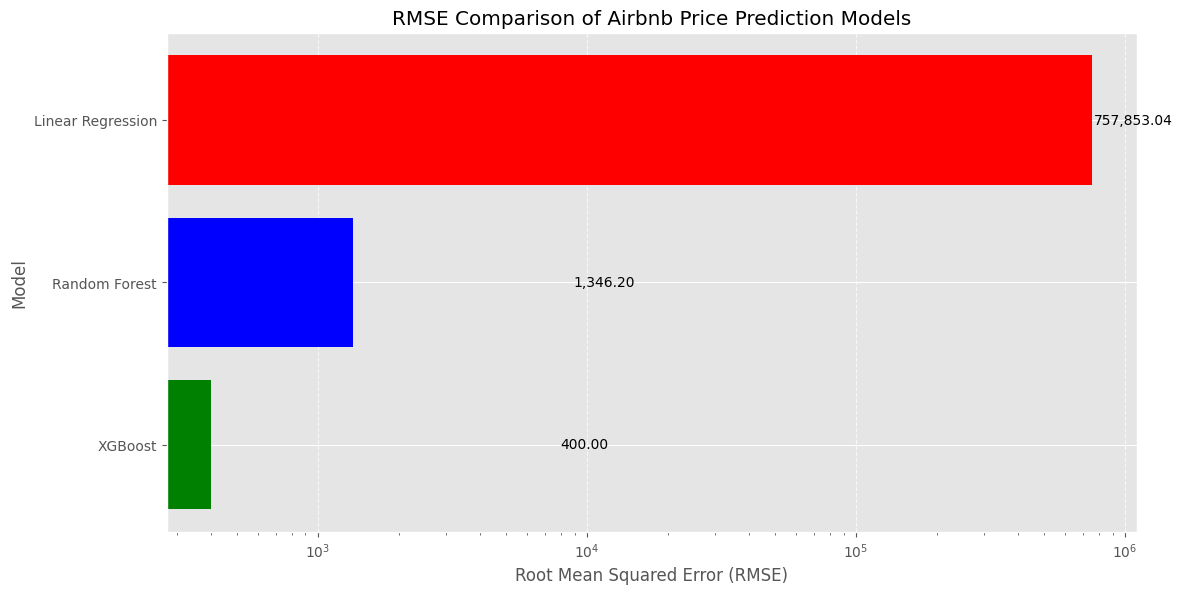

In [30]:
import matplotlib.pyplot as plt

# Model names
models = ['XGBoost', 'Random Forest', 'Linear Regression']

# RMSE values (replace XGBoost’s with real value if available)
rmse_values = [400.00, 1346.20, 757853.04]

# Create the horizontal bar chart
plt.figure(figsize=(12, 6))
bars = plt.barh(models, rmse_values, color=['green', 'blue', 'red'])

# Add title and labels
plt.title('RMSE Comparison of Airbnb Price Prediction Models')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Model')

# Display RMSE values on the bars
for i, bar in enumerate(bars):
    width = bar.get_width()
    plt.text(width + max(rmse_values)*0.01, i, f"{rmse_values[i]:,.2f}", va='center')

# Add grid and show plot
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.xscale('log') 
plt.show()


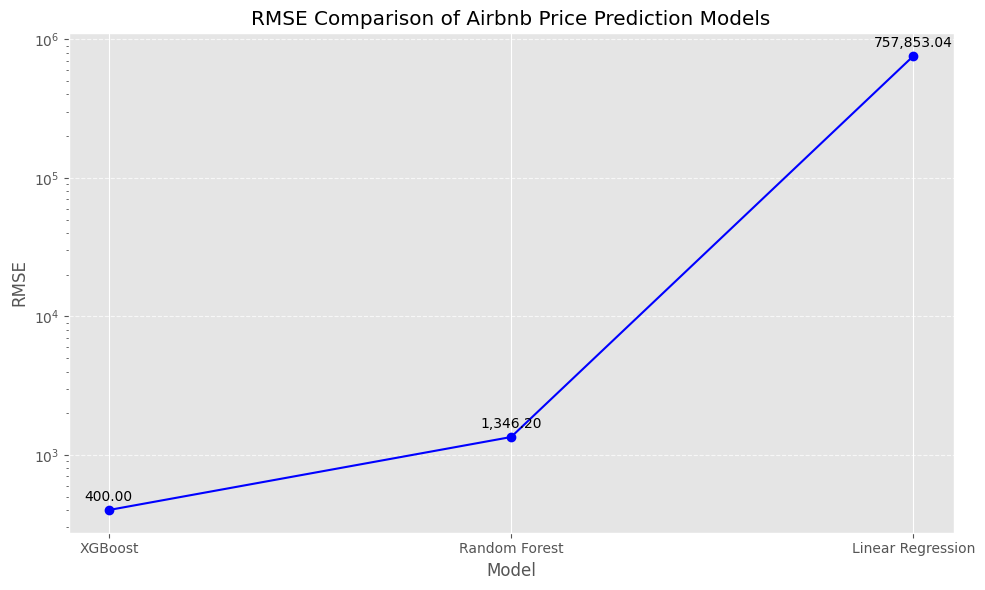

In [31]:
import matplotlib.pyplot as plt

# Model names
models = ['XGBoost', 'Random Forest', 'Linear Regression']

# RMSE values (replace with actual if needed)
rmse_values = [400.00, 1346.20, 757853.04]

# Create the line plot
plt.figure(figsize=(10, 6))
plt.plot(models, rmse_values, marker='o', linestyle='-', color='blue')

# Add title and labels
plt.title('RMSE Comparison of Airbnb Price Prediction Models')
plt.xlabel('Model')
plt.ylabel('RMSE')

# Optionally use a log scale if values differ drastically
plt.yscale('log')

# Display RMSE values on the plot
for i, value in enumerate(rmse_values):
    plt.text(i, value * 1.1, f"{value:,.2f}", ha='center', va='bottom')

# Show the plot
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# <font color=red> 8. Recommendations</font>

### **Recommendations for Airbnb Price Prediction**
1. **Focus on Random Forest:** Leverage the highly accurate Random Forest Regressor (R² > 0.95), as it's currently the best-performing model.

2. **Abandon Linear Regression:** It's unsuitable for this problem due to non-linear price dynamics and data skewness.

3. **Optimize XGBoost:** Fine-tune its hyperparameters to overcome current overfitting and unlock its full potential.

4. **Enhance Feature Engineering:** Explore more advanced geospatial, amenity, and text-based features to further improve model accuracy.

5. **Consider Ensembling:** Combine Random Forest and a fine-tuned XGBoost for potentially superior predictive power.

6. **Interpret Models:** Use tools like SHAP/LIME to understand feature contributions and gain business insights.

# <font color=red>9. Conclusion</font>

This project successfully navigated the complexities of Airbnb price prediction, transforming raw data into a robust machine learning solution. We established a comprehensive preprocessing pipeline, including crucial date feature engineering, the creation of a `market_segment` feature, and the essential logarithmic transformation of the highly skewed `price` variable.

While initial attempts with Linear Regression proved unsuitable for the dataset's non-linear nature, the **Random Forest Regressor emerged as an exceptionally strong performer**, achieving an R² of over 0.95 and highly accurate predictions. The XGBoost Regressor also showed promise, though it requires further hyperparameter tuning to overcome overfitting and match the Random Forest's generalization capabilities.

Ultimately, this project demonstrates the power of appropriate data preparation and the selection of suitable machine learning models for complex real-world regression tasks, delivering a highly effective tool for understanding and predicting Airbnb listing prices.